<a href="https://colab.research.google.com/github/usnaik/data-science/blob/main/Data_Analytics_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analytics and Pandas


## Learning Objectives



At the end of the experiment, you will be able to :


* understand the requirements for a “clean” dataset, ready for use in statistical analysis

* use Python libraries like Pandas, Numpy, and Matplotlib to perform the  data-preprocessing steps

* obtain probability and statistics based insights from the data


## Dataset

The dataset chosen for this experiment is the **Play Store** dataset which is  publicly available and created with this [methodology](https://nycdatascience.com/blog/student-works/google-play-store-everything-that-you-need-to-know-about-the-android-market/)  

This dataset consists of 10841 records. Each record is made up of 13 fields.

**For example**, Each record consists of App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver.

## Problem Statement

Before we can derive any meaningful insights from the Play Store data, it is essential to pre-process the data and make it suitable for further analysis. This pre-processing step forms a major part of data wrangling (or data munging) and ensures better quality data. It consists of the transformation and mapping of data from a "raw" data form into another format so that it is more valuable for a variety of downstream purposes such as analytics. Data analysts typically spend a sizeable amount of time in the process of data wrangling, compared to the actual analysis of the data.

After data munging is performed, several actionable insights can be derived from the Play Store apps data. Such insights could help to unlock the enormous potential to drive app-making businesses to success.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/googleplaystore.csv

#### Import required packages

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [ ]:
# YOUR CODE HERE
df = pd.read_csv("googleplaystore.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.Type.value_counts()

,count
Type,
Free,10039
Paid,800
0,1


In [ ]:
# Drop rows where Type not in Free or Paid
df = df[df['Type'].apply(lambda x: x in ['Free', 'Paid'])]

In [ ]:
df.Type.value_counts()

,count
Type,
Free,10039
Paid,800


## Pre-processing

### Task 1: Data Cleaning

* Check whether there are any null values and figure out how you want to handle them?
  
    **Hint:** isnan(), dropna(), fillna()
* If there is any duplication of a record, how would you like to handle it?

    Hint: [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Are there any non-English apps? And how to filter them?

* In the size column, multiply 1,000,000 with M in the cell and multiply by 1000 if we have K in the cell.

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# YOUR CODE HERE
df.isnull().sum()
df.isna().sum()

,0
App,0
Category,0
Rating,1473
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
# # fill null values with means and mediains

# # Fill null values in numerical columns with the mean
# numerical_cols = df.select_dtypes(include=np.number).columns
# for col in numerical_cols:
#     df[col] = df[col].fillna(df[col].mean())
# print("numerical_cols: ",numerical_cols)

# # Fill null values in non-numerical columns with the median (or mode if appropriate)
# non_numerical_cols = df.select_dtypes(exclude=np.number).columns
# for col in non_numerical_cols:
#     df[col] = df[col].fillna(df[col].mode()[0]) # Using mode for categorical data
# print("non_numerical_cols: ",non_numerical_cols)


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Check if null values have been addressed
df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
df.shape

(9360, 13)

In [ ]:
# df.duplicated().sum()
duplicate_rows = df.duplicated(keep=False)
duplicate_rows.shape

(9360,)

In [ ]:
duplicate_rows.sum()

876

In [ ]:
df[duplicate_rows]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
#  Examples of using inline help in NoteBook
# df?
# df.drop_duplicates?
# help(df.drop_duplicates)

In [ ]:
# df.drop_duplicates(keep='first', inplace=True)
df_no_dups = df.drop_duplicates(keep='first')
df_no_dups.shape

(8886, 13)

In [ ]:
print("Number of duplicate rows removed : ", df.shape[0] - df_no_dups.shape[0])

Number of duplicate rows removed :  474


In [ ]:
# Check for a sample duplicate row
df[df.App == "Ebook Reader"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
4095,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up


In [ ]:
# Check duplicate in a sample row was removed
df_no_dups[df_no_dups.App == "Ebook Reader"]
df_no_dups[df_no_dups['App'] == "Ebook Reader"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up


In [ ]:
# identify the duplicate apps
len(set(df['App'].values)), df.shape

(8190, (9360, 13))

In [ ]:
#  If there any non-English apps - filter them out

import re # regular expression package

def is_english(text:str):
    """
    Checks if a given string is likely English by looking for ASCII characters.

    Args:
        text: The input string.

    Returns:
        True if the string likely contains English text, False otherwise.
    """
    try:
        # special_characters = string.punctuation
        # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
        # text = re.sub(special_characters, '', text)
        text = re.sub(r'[\-–—©®™℠℗&%£$€!@#\?\.,;:\'"/\(\)\[\]\{\}]', '', text)
        text.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True


In [ ]:
# Filter out rows with non-English characters
df_no_dups_f = df_no_dups[df_no_dups['App'].apply(lambda x: is_english(x))]

# Print the filtered DataFrame
df_no_dups_f.shape

(8688, 13)

In [ ]:
print("Count of Non English Apps filtered : ", len(df_no_dups) - len(df_no_dups_f))

Count of Non English Apps filtered :  198


In [ ]:
df_no_dups_f['Size'] = df_no_dups_f['Size'].apply(lambda x: str(x).replace('Varies with device','NaN') if 'Varies with device' in x else x)
df_no_dups_f['Size'] = df_no_dups_f['Size'].apply(lambda x: float(str(x).rstrip('M'))*(10**6) if 'M' in str(x) else x)
df_no_dups_f['Size'] = df_no_dups_f['Size'].apply(lambda x: float(str(x).rstrip('k'))*(10**3) if 'k' in str(x) else x)
df_no_dups_f = df_no_dups_f[~(df_no_dups_f['Size'] == 'NaN')]
df_no_dups_f['Size'] = df_no_dups_f['Size'].astype(float)

In [ ]:
# # Apply the function to the 'Size' column and create a new column 'Size_in_MB'
# def convert_size(size_str):
#     if isinstance(size_str, str):
#         if size_str[-1]=='M':
#             size_num = float(size_str.replace('M', ''))
#             return size_num * 1000000
#         elif size_str[-1]=='k':
#             size_num = float(size_str.replace('k', ''))
#             return size_num * 1000
#         else:
#             return size_str  # Handle cases where no 'M' or 'k' is present
#     else:
#         return size_str # Handle non-string values
#
# df_no_dups_f['Size_in_bytes'] = df_no_dups_f['Size'].apply(convert_size)

In [ ]:
df_no_dups_f

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [ ]:
df_no_dups_f.shape

(7244, 13)

## Visualization

### Task 2: Perform the  following tasks:

##### Exercise 1: Find the number of apps in various categories by using an appropriate plot.

In [ ]:
df_no_dups_f['Category'].nunique()

33

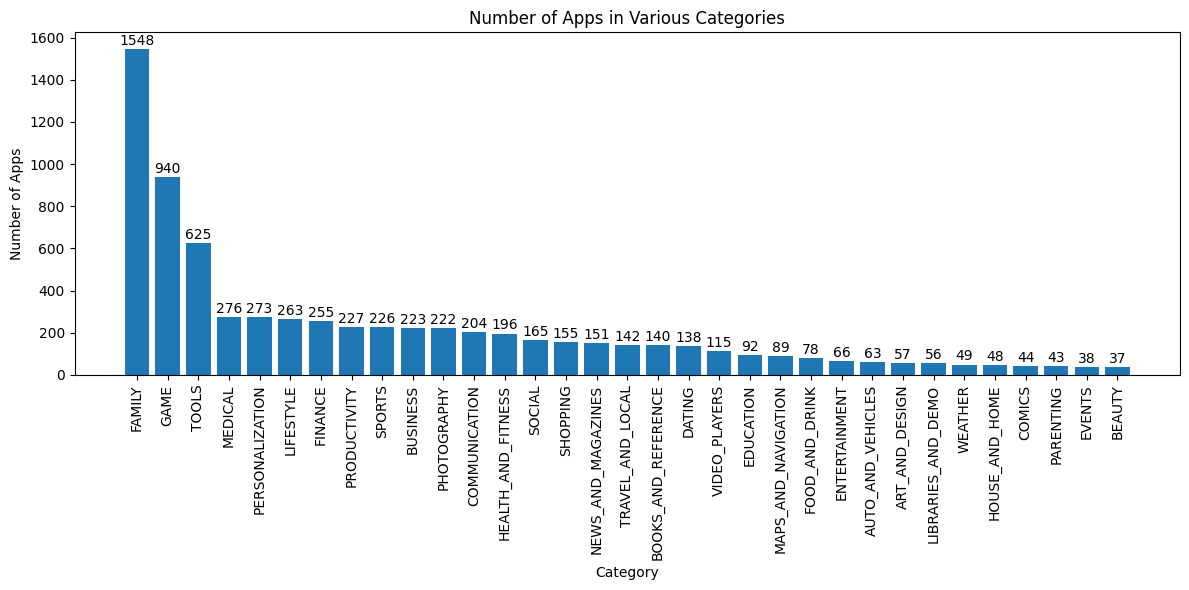

In [ ]:
# Count the number of apps in each category
category_counts = df_no_dups_f['Category'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(category_counts.index, category_counts.values)

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Various Categories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
counts_of_Apps = df_no_dups_f['Category'].value_counts()
# counts_of_Apps

In [ ]:
counts_of_Apps.index.values

array(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'PERSONALIZATION',
       'LIFESTYLE', 'FINANCE', 'PRODUCTIVITY', 'SPORTS', 'BUSINESS',
       'PHOTOGRAPHY', 'COMMUNICATION', 'HEALTH_AND_FITNESS', 'SOCIAL',
       'SHOPPING', 'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL',
       'BOOKS_AND_REFERENCE', 'DATING', 'VIDEO_PLAYERS', 'EDUCATION',
       'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK', 'ENTERTAINMENT',
       'AUTO_AND_VEHICLES', 'ART_AND_DESIGN', 'LIBRARIES_AND_DEMO',
       'WEATHER', 'HOUSE_AND_HOME', 'COMICS', 'PARENTING', 'EVENTS',
       'BEAUTY'], dtype=object)

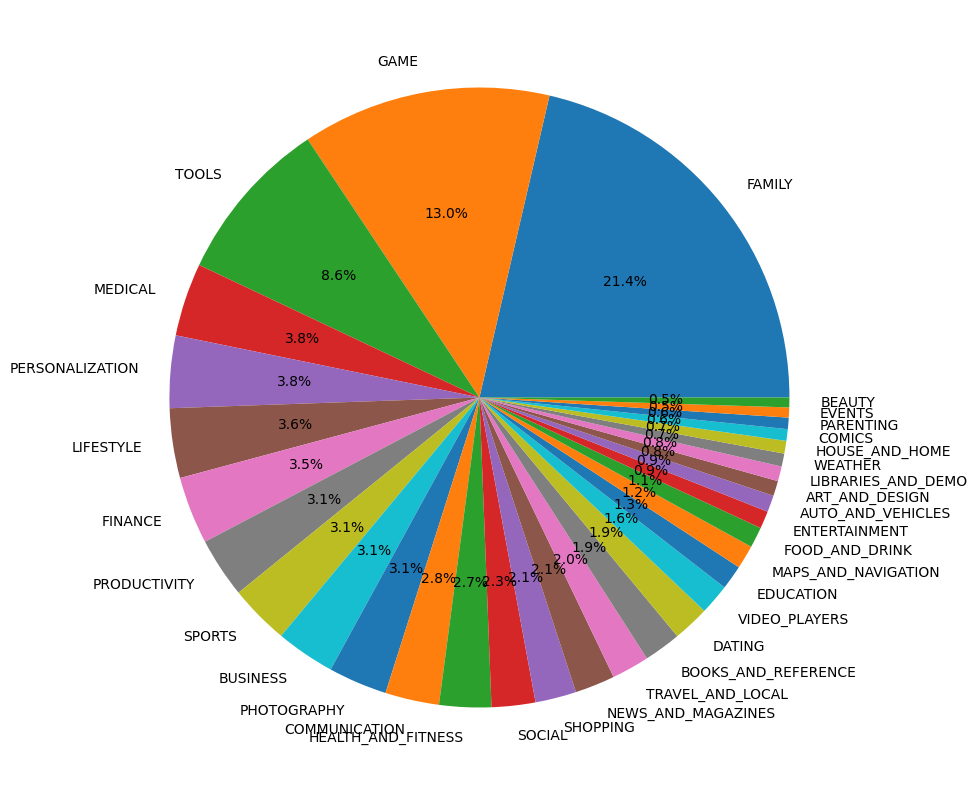

In [ ]:
plt.figure(figsize=(10, 15))
plt.pie(counts_of_Apps, labels = counts_of_Apps.index.values, autopct='%1.1f%%')
plt.show()

##### Exercise 2: Explore the distribution of free and paid apps across different categories

**Hint:** Stacked Bar Graph, [link](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html)

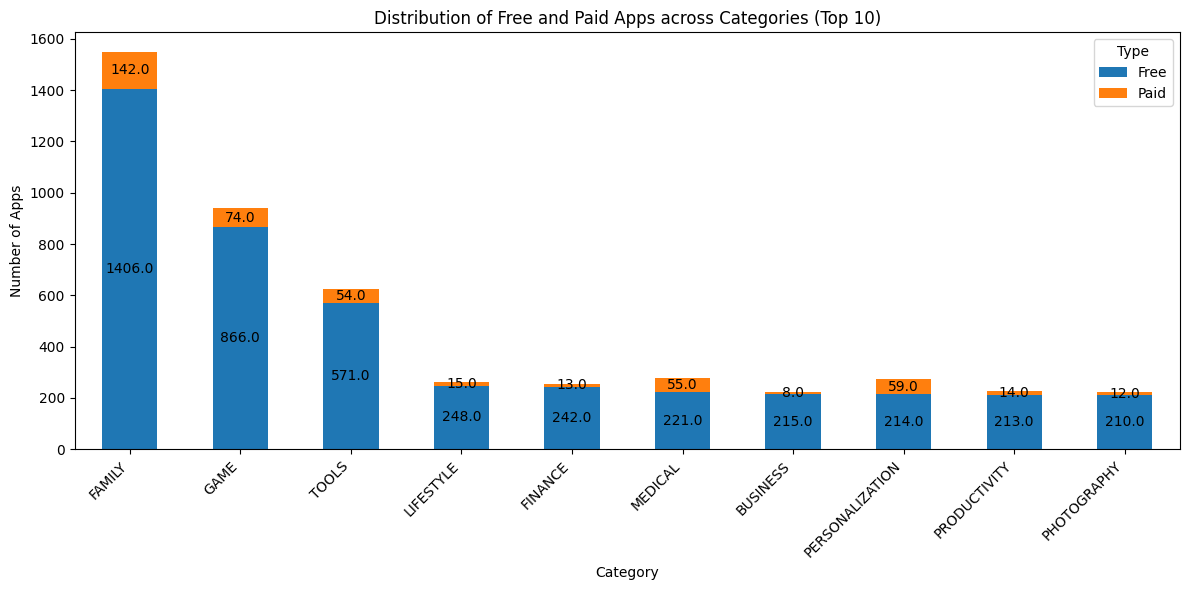

In [ ]:
# Group the data by category and app type, then count the occurrences
category_type_counts = df_no_dups_f.groupby(['Category', 'Type']).size().unstack(fill_value=0)

# Sort the categories by the total number of apps in descending order
category_type_counts = category_type_counts.sort_values(by=['Free', 'Paid'], ascending=False)

# Select the top 10 categories
top_10_categories = category_type_counts.head(10)

# Create the stacked bar plot
ax = top_10_categories.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add the total count on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Distribution of Free and Paid Apps across Categories (Top 10)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout()
plt.show()

##### Exercise 3: Represent the distribution of app rating on a scale of 1-5 using an appropriate plot

**Hint:** histogram / strip plot

In [ ]:
ps_ratings_only = df_no_dups_f.dropna(subset=['Rating'])
ps_ratings_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7244 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7244 non-null   object 
 1   Category        7244 non-null   object 
 2   Rating          7244 non-null   float64
 3   Reviews         7244 non-null   object 
 4   Size            7244 non-null   float64
 5   Installs        7244 non-null   object 
 6   Type            7244 non-null   object 
 7   Price           7244 non-null   object 
 8   Content Rating  7244 non-null   object 
 9   Genres          7244 non-null   object 
 10  Last Updated    7244 non-null   object 
 11  Current Ver     7244 non-null   object 
 12  Android Ver     7244 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [ ]:
#used to decide threshold buckets for ratings
freq_cnts = pd.cut(ps_ratings_only['Rating'], bins=10).value_counts()
freq_cnts

,count
Rating,
"(4.2, 4.6]",2904
"(3.8, 4.2]",1990
"(4.6, 5.0]",948
"(3.4, 3.8]",744
"(3.0, 3.4]",320
"(2.6, 3.0]",174
"(2.2, 2.6]",78
"(1.8, 2.2]",43
"(1.4, 1.8]",23


In [ ]:
bins = [0, 3.8, 4.5, float('inf')]
labels = [' < 3.8', '3.8 - 4.5', '> 4.5']
ps_ratings_only['Ratings_Bucket'] = pd.cut(ps_ratings_only['Rating'], bins=bins, labels=labels)
ps_ratings_only['Ratings_Bucket'].value_counts()

,count
Ratings_Bucket,
3.8 - 4.5,4293
> 4.5,1549
< 3.8,1402


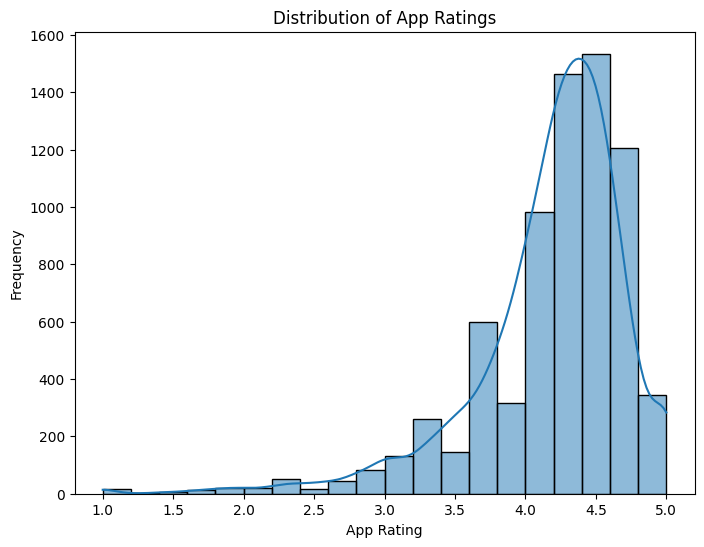

In [ ]:
# prompt: Represent the distribution of app rating on a scale of 1-5 using an appropriate plot

# Create a histogram of app ratings
plt.figure(figsize=(8, 6))
sns.histplot(ps_ratings_only['Rating'], bins=20, kde=True)
plt.xlabel('App Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')
plt.show()



##### Exercise 4: Identify outliers of the rating column by plotting the boxplot category wise and handle them.

**Hint:** Removing outliers using Z-score, quantile [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

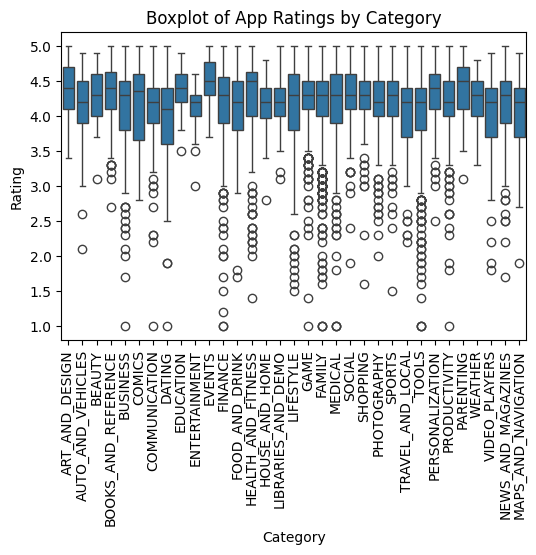

Number of outliers removed using Z-score: 141


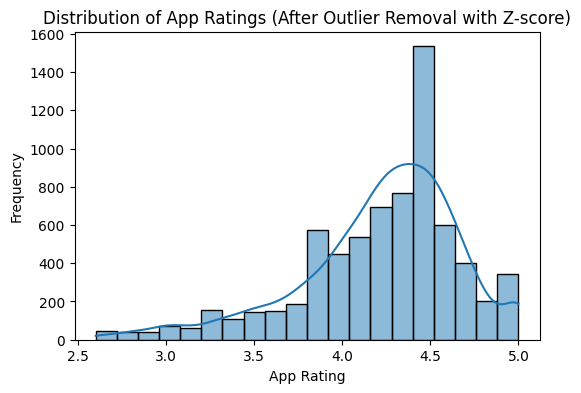

Number of outliers removed using IQR: 456


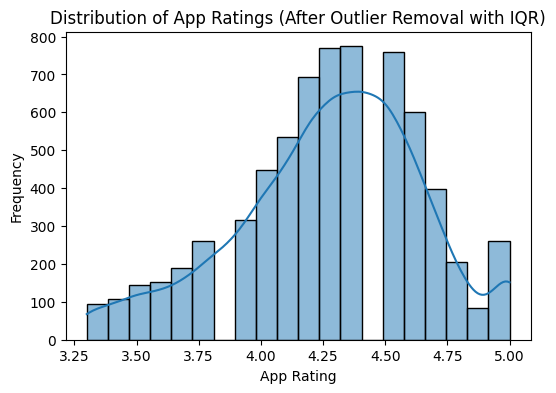

In [ ]:
# Identify outliers of the rating column.

plt.figure(figsize=(6, 4))
sns.boxplot(x='Category', y='Rating', data=ps_ratings_only)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Boxplot of App Ratings by Category')
plt.show()

# Calculate Z-scores for the 'Rating' column
ps_ratings_only['zscore'] = np.abs((ps_ratings_only['Rating'] - ps_ratings_only['Rating'].mean()) / ps_ratings_only['Rating'].std())

# Remove outliers based on Z-score threshold
threshold = 3
ps_ratings_only_no_outliers_z = ps_ratings_only[ps_ratings_only['zscore'] < threshold]

print(f"Number of outliers removed using Z-score: {len(ps_ratings_only) - len(ps_ratings_only_no_outliers_z)}")

# Visualize the distribution of ratings after outlier removal
plt.figure(figsize=(6, 4))
sns.histplot(ps_ratings_only_no_outliers_z['Rating'], bins=20, kde=True)
plt.xlabel('App Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings (After Outlier Removal with Z-score)')
plt.show()

# Alternatively, use IQR to remove outliers:
Q1 = ps_ratings_only['Rating'].quantile(0.25)
Q3 = ps_ratings_only['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ps_ratings_only_no_outliers_iqr = ps_ratings_only[
    (ps_ratings_only['Rating'] >= lower_bound) & (ps_ratings_only['Rating'] <= upper_bound)
]

print(f"Number of outliers removed using IQR: {len(ps_ratings_only) - len(ps_ratings_only_no_outliers_iqr)}")

# Visualize the distribution of ratings after outlier removal
plt.figure(figsize=(6, 4))
sns.histplot(ps_ratings_only_no_outliers_iqr['Rating'], bins=20, kde=True)
plt.xlabel('App Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings (After Outlier Removal with IQR)')
plt.show()


##### Exercise 5: Plot the barplot of all the categories indicating no. of installs

<Figure size 1200x600 with 0 Axes>

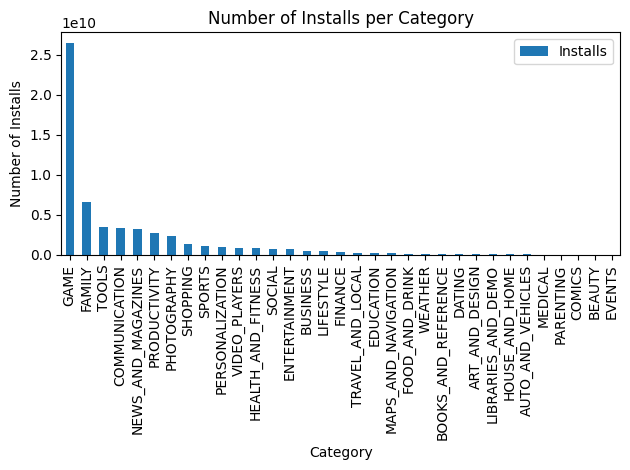

In [ ]:
# Convert 'Installs' column to numeric, handling special characters
df_no_dups_f['Installs'] = df_no_dups_f['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
df_no_dups_f['Installs'] = pd.to_numeric(df_no_dups_f['Installs'], errors='coerce')

# Group by category and sum installs
# category_installs = df_no_dups_f.groupby('Category')['Installs'].sum().
# sns.barplot(x=temp_df['Installs'], y=temp_df['Category'] )

category_installs = df_no_dups_f.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by='Installs',ascending=False)


# Create the bar plot
plt.figure(figsize=(12, 6))
category_installs.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.title('Number of Installs per Category')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## Insights


### Task 3: Derive the below insights

##### Exercise 1: Does the price correlate with the size of the app?

  **Hint:** plot the scatterplot of `Size` and `Price`

In [ ]:
df_no_dups_f['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

<Figure size 1000x600 with 0 Axes>

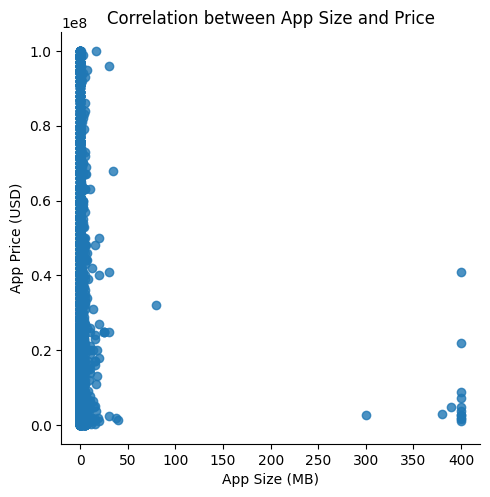

In [ ]:
# Convert 'Size' column to numeric, handling 'Varies with device'
df_no_dups_f['Size'] = df_no_dups_f['Size'].astype(str).str.replace('Varies with device', '0')
df_no_dups_f['Size'] = pd.to_numeric(df_no_dups_f['Size'], errors='coerce')

# Convert 'Price' column to numeric, removing '$' sign
df_no_dups_f['Price'] = df_no_dups_f['Price'].astype(str).str.replace('$', '')
df_no_dups_f['Price'] = pd.to_numeric(df_no_dups_f['Price'], errors='coerce')

# sns.lmplot(x='Price', y='Size', data=df_no_dups_f, fit_reg=False) #,size=10);

# Create the scatterplot
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Price', y='Size', data=df_no_dups_f)
sns.lmplot(x='Price', y='Size', data=df_no_dups_f, fit_reg=False)
plt.xlabel('App Size (MB)')
plt.ylabel('App Price (USD)')
plt.title('Correlation between App Size and Price')
plt.show()

From the above scatter plot we see no correlation established between app size and price


##### Exercise 2: Find the popular app categories based on rating and no. of installs

**Hint:** [df.groupby.agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html); Taking the average rating could be another approach



In [ ]:
# Group data by category and aggregate rating and installs
popular_apps = df_no_dups_f.groupby('Category').agg({'Rating': 'mean', 'Installs': 'sum'})

# Sort by rating and installs in descending order
popular_apps = popular_apps.sort_values(by=['Rating', 'Installs'], ascending=False)

# Display the top categories
print(popular_apps)


                       Rating     Installs
Category                                  
EVENTS               4.478947     10648400
ART_AND_DESIGN       4.380702     99227100
EDUCATION            4.376087    205202000
PARENTING            4.351163     23066010
PERSONALIZATION      4.319780    997019930
BOOKS_AND_REFERENCE  4.318571    134719155
BEAUTY               4.291892     13416200
GAME                 4.269255  26447480717
SOCIAL               4.265455    788184475
WEATHER              4.238776    138696500
SHOPPING             4.228387   1301221540
SPORTS               4.202655   1046701465
HEALTH_AND_FITNESS   4.201020    801356220
FAMILY               4.189599   6652957330
MEDICAL              4.176812     35459176
LIBRARIES_AND_DEMO   4.169643     58282000
AUTO_AND_VEHICLES    4.147619     43769800
ENTERTAINMENT        4.146970    747960000
NEWS_AND_MAGAZINES   4.141060   3213182050
PRODUCTIVITY         4.140529   2709102080
HOUSE_AND_HOME       4.139583     50382000
PHOTOGRAPHY

##### Exercise 3: How many apps are produced in each year category-wise ?

  * Create a `Year` column by slicing the values of `Last Updated` column and find the Year with most no. of apps produced

    **For example**, slice the year `2017` from `February 8, 2017`

  * Find the categories which have a consistent rating in each year

      **Hint:** `sns.countplot`

In [ ]:
# prompt: How many apps are produced in each year category-wise ? Create a Year column by slicing the values of Last Updated column and find the Year with most no. of apps produced

# Extract the year from the 'Last Updated' column
df_no_dups_f['Year'] = pd.to_datetime(df_no_dups_f['Last Updated']).dt.year

# Group by year and category, then count the number of apps
apps_per_year_category = df_no_dups_f.groupby(['Year', 'Category'])['App'].count().reset_index()

# Rename the 'App' column to 'App Count'
apps_per_year_category = apps_per_year_category.rename(columns={'App': 'App Count'})

# Display the result
print(apps_per_year_category)

# Find the year with the most number of apps produced
year_with_most_apps = apps_per_year_category.groupby('Year')['App Count'].sum().idxmax()
print(f"\nThe year with the most number of apps produced is: {year_with_most_apps}")


     Year             Category  App Count
0    2010               FAMILY          1
1    2011  BOOKS_AND_REFERENCE          1
2    2011             BUSINESS          1
3    2011               FAMILY          1
4    2011                 GAME          4
..    ...                  ...        ...
179  2018               SPORTS        167
180  2018                TOOLS        344
181  2018     TRAVEL_AND_LOCAL        110
182  2018        VIDEO_PLAYERS         69
183  2018              WEATHER         35

[184 rows x 3 columns]

The year with the most number of apps produced is: 2018


In [ ]:
# categories which have a consistent rating in each year

# Group data by category and year, then calculate the mean rating for each group
category_year_ratings = df_no_dups_f.groupby(['Category', 'Year'])['Rating'].mean().reset_index()

# Calculate the standard deviation of ratings for each category across all years
category_rating_std = category_year_ratings.groupby('Category')['Rating'].std()

# Find categories with low standard deviation (indicating consistent ratings)
consistent_categories = category_rating_std[category_rating_std < 0.5].index  # Adjust threshold as needed

print("Categories with consistent ratings across years:")
consistent_categories

Categories with consistent ratings across years:


Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME',
       'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

##### Exercise 4: Identify the highest paid apps with a good rating

In [ ]:
# Assuming 'good rating' is above a certain threshold (e.g., 4.0)
good_rating_threshold = 4.0

# Sort the DataFrame by price in descending order and then by rating in descending order
highest_paid_apps = df_no_dups_f[df_no_dups_f['Rating'] >= good_rating_threshold].sort_values(by=['Price', 'Rating'], ascending=False)

# Display the top few rows to see the highest-paid apps with good ratings
print(highest_paid_apps[['App', 'Price', 'Rating']].head(20)) # Adjust the number as needed


                                                    App   Price  Rating
5362                                      I Am Rich Pro  399.99     4.4
4197                             most expensive app (H)  399.99     4.3
5369                                          I am Rich  399.99     4.3
5356                                  I Am Rich Premium  399.99     4.1
5364                     I am rich (Most expensive app)  399.99     4.1
5354                                     I am Rich Plus  399.99     4.0
5373                                 I AM RICH PRO PLUS  399.99     4.0
2253                          Vargo Anesthesia Mega App   79.99     4.6
2414                                       LTC AS Legal   39.99     4.0
5360                                   I am Rich Person   37.99     4.2
5489                          AP Art History Flashcards   29.99     5.0
2298                                 PTA Content Master   29.99     4.2
3039                            Golfshot Plus: Golf GPS   29.99 

##### Exercise 5: Are the top-rated apps genuine ? How about checking reviews count of top-rated apps ?

In [ ]:
# Assuming 'good rating' is above a certain threshold (e.g., 4.5)
good_rating_threshold = 4.5

# Sort the DataFrame by rating in descending order and then by number of reviews
top_rated_apps = df_no_dups_f[df_no_dups_f['Rating'] >= good_rating_threshold].sort_values(by=['Rating', 'Reviews'], ascending=[False, False])

# Display the top few rows to see the top-rated apps and their review counts
print(top_rated_apps[['App', 'Rating', 'Reviews']].head(20)) # Adjust the number as needed


                                                   App  Rating Reviews
5245                                        AJ RETAILS     5.0       9
9008                                          DW Timer     5.0       9
9188                                        EB Scanner     5.0       9
5795                                  Axe Champs! Wars     5.0       8
6391                             BK Arogyam Task Track     5.0       8
6861                               BV Sridhara Maharaj     5.0       8
7170          Yazdani Cd Center EllahAbad Official App     5.0       8
7321                                           CG Jobs     5.0       8
7466                                            211:CK     5.0       8
7756                                           iReadMe     5.0       8
8327               The Divine Feminine App: the DF App     5.0       8
9089                                           DYPSOET     5.0       8
9119                                           chat dz     5.0       8
9293  

##### Exercise 6: If the number of reviews of an app is very low, what could be the reason for its top-rating ?

In [ ]:
# topRated = df_no_dups_f[(df_no_dups_f.Rating > 4.5) & (df_no_dups_f.Type == 'Paid')].sort_values(by='Price',ascending=False)
# topRated.head(10)

In [ ]:
# Assuming 'good rating' is above a certain threshold (e.g., 4.5)
good_rating_threshold = 4.5
low_review_threshold = 10  # Define a threshold for low review counts

# Filter apps with good ratings and low review counts
low_review_high_rating_apps = df_no_dups_f[
    (df_no_dups_f['Rating'] >= good_rating_threshold) & (df_no_dups_f['Reviews'].astype(int) <= low_review_threshold)
]

# Display these apps
print(low_review_high_rating_apps[['App', 'Rating', 'Reviews']])


                                                     App  Rating Reviews
608                       Chat Kids - Chat Room For Kids     4.7       6
612                        American Girls Mobile Numbers     5.0       5
615                                         Awake Dating     5.0       2
633                                Spine- The dating app     5.0       5
636           Girls Live Talk - Free Text and Video Chat     5.0       6
...                                                  ...     ...     ...
10697                                            Mu.F.O.     5.0       2
10706  Neon Blue Gaming Wallpaper&Theme fo Lenovo K8 ...     4.6       7
10767                                           NFP 2018     4.8       8
10776                                   Monster Ride Pro     5.0       1
10837                   Fr. Mike Schmitz Audio Teachings     5.0       4

[322 rows x 3 columns]


### Potential reasons for high ratings with few reviews:
* New apps:  Newly released apps may have few reviews but high initial ratings due to early adopters or enthusiasts.
* Niche apps: Apps targeting a very small, specific audience might have limited users, leading to fewer reviews but still maintain high ratings among those users.
* Biased or fake reviews: It's possible some apps have inflated ratings due to artificial reviews (though less likely when the review count is extremely low).
* Inaccurate data: In some cases, the data itself might be incorrect or incomplete.

##### Exercise 7: What is the 95% confidence interval for the rating of apps in the Google Play Store?

In [ ]:
import scipy.stats as st

# Assuming 'ps_ratings_only_no_outliers_z' contains the cleaned ratings data
ratings = ps_ratings_only_no_outliers_z['Rating']

# Calculate the confidence interval
confidence_interval = st.t.interval(0.95, len(ratings) - 1, loc=np.mean(ratings), scale=st.sem(ratings))
mean = np.mean(ratings)
print("mean: ", mean)

print(f"The 95% confidence interval for the app ratings is: {confidence_interval}")


mean:  4.214514993664649
The 95% confidence interval for the app ratings is: (4.20389037120542, 4.225139616123878)


##### Exercise 8: Test if there is a statistically significant difference in the ratings between free and paid apps using a t-test

Steps:

* Set the null hypothesis and alternate hypothesis
* Separate the ratings of free and paid apps.
* Perform t-test: Use an independent samples t-test.
* Interpret results based on the p-value, decide whether to reject or fail to reject the null hypothesis.

In [ ]:
# Separate ratings for free and paid apps
free_app_ratings = df_no_dups_f[df_no_dups_f['Type'] == 'Free']['Rating']
paid_app_ratings = df_no_dups_f[df_no_dups_f['Type'] == 'Paid']['Rating']

# Perform independent samples t-test
t_statistic, p_value = st.ttest_ind(free_app_ratings, paid_app_ratings)

# Set significance level
alpha = 0.05

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference in ratings between free and paid apps.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in ratings between free and paid apps.")


T-statistic: -3.530382855923007
P-value: 0.0004175376062861707
Reject the null hypothesis.
There is a statistically significant difference in ratings between free and paid apps.
